(92,)
8
mu: 1.5162574300926457
I0: 7.701971261843618e-06


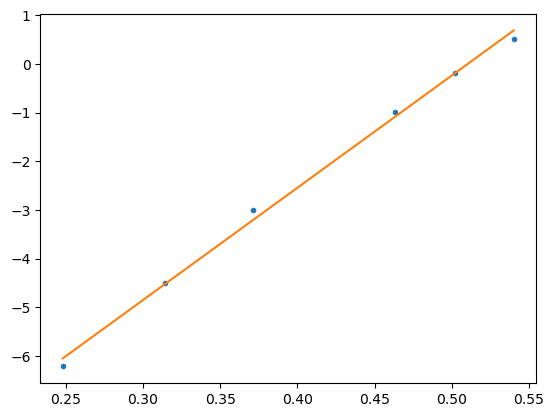

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
df  = pd.read_csv('Dati3.csv')
v   = df["Voltmetro(V)"].to_numpy()
a   = df["Ampmetro(mA)"].to_numpy()
e_v = df["err_volt"].to_numpy()
e_a = df["err_amp"].to_numpy()

volt     = np.split(v, np.where(v == 0)[0])      
amp      = np.split(a, np.where(v == 0)[0])
err_volt = np.split(e_v, np.where(v == 0)[0])
err_amp  = np.split(e_a, np.where(v == 0)[0])

x = (volt[1][2:8])
y = np.log(amp[1][2:8])
sigma_y = err_amp[1][2:8]

S00 = np.sum(1/(sigma_y**2))
S11 = np.sum(x*y/(sigma_y**2))
S10 = np.sum(x/(sigma_y**2))
S01 = np.sum(y/(sigma_y**2))
S20 = np.sum(x**2/(sigma_y**2))

D = S00*S20 - S10**2
m = (S00*S11 - S10*S01)/D
q = (S01*S20 - S11*S10)/D

print('mu:',35/m)
print('I0:',math.exp(q))

plt.errorbar(x, y, yerr = sigma_y, fmt = '.')
plt.errorbar(x, m*x+q)
plt.show()